In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st

In [24]:
J_data = pd.read_csv("../EnhancerPredictions/17_June_data/J_EnhancerPredictions.txt", sep='\t')
data = pd.read_csv("../EnhancerPredictions/17_June_data/EnhancerPredictions.txt", sep='\t')

unique_genes = J_data[['TargetGene', 'TargetGeneTSS']].drop_duplicates()

In [119]:
print(len(J_data))
print(len(data))
print(len(unique_genes))

1372
1371
348


HiC data : GSE63525_K562_combined.hic
Processing HiC data: 

python src/juicebox_dump.py \
--hic_file GSE63525_K562_combined.hic \
--juicebox "java -jar juicer_tools.jar" \
--outdir $HICDIR/raw/ \
--chromosomes 22

python src/make_bedgraph_from_HiC.py \
--outdir $HICDIR/bedgraph/ \
--genes example/config/RefSeqCurated.170308.bed.CollapsedGeneBounds.chr22.bed \
--hic_dir $HICDIR/raw/5kb_resolution_intrachromosomal/


# Counting number of lines in files 

Kristy ENCFF030DCL.macs2_peaks.narrowPeak.candidateRegions.bed 136948 
Jacob ENCFF030DCL.macs2_peaks.narrowPeak.candidateRegions.bed 136946

Kristy EnhancerList.txt.gz 136939
Jacob EnhancerList.txt.gz 136937


In [138]:
#print(data.columns)

In [125]:
merged_df = pd.merge(J_data, data, how='inner', on=['chr', 'start', 'end', 'TargetGene', 'TargetGeneTSS'])
print(len(merged_df))
print(merged_df[:5])
#1261 common entries between the two

1261
     chr     start       end TargetGene  TargetGeneTSS     class_x  \
0  chr22  17080380  17081156     CCT8L2       17073700  intergenic   
1  chr22  17083849  17085052     CCT8L2       17073700       genic   
2  chr22  17081312  17081812     CCT8L2       17073700  intergenic   
3  chr22  17080380  17081156     TPTEP1       17082800  intergenic   
4  chr22  17085387  17085887     TPTEP1       17082800       genic   

   hic.distance.adj_x  activity_base_x  ABC.Score_x     class_y  \
0             45.8664           2.8552       0.0502  intergenic   
1             45.8664           9.0570       0.1592       genic   
2             45.8664           2.4530       0.0431  intergenic   
3            100.0000           2.8552       0.0671  intergenic   
4             73.8763           1.6974       0.0295       genic   

   hic.distance.adj_y  activity_base_y  ABC.Score_y  
0             58.0281           2.8552       0.0577  
1             58.0281           9.0570       0.1830  
2        

## Correlation Graph between K_ABC and J_ABC

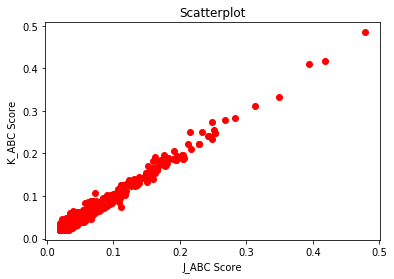

In [126]:
x= merged_df['ABC.Score_x']
y= merged_df['ABC.Score_y']
plt.xlabel('J_ABC Score')
plt.ylabel('K_ABC Score')
plt.title('Scatterplot')
plt.plot(x, y, 'ro')

# Look at different points in the scatterplot 
# for the bigger differences 


Slight discrepencies here could be due to the different HiC file and processing? 

In [130]:
# Gaussian kernel density 
nbins = 400
actual_scores_1 = np.asarray(x)
scores_1 = np.asarray(y)


k = st.gaussian_kde([actual_scores_1, scores_1])
xi, yi = np.mgrid[actual_scores_1.min():actual_scores_1.max():nbins*1j, scores_1.min():scores_1.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))


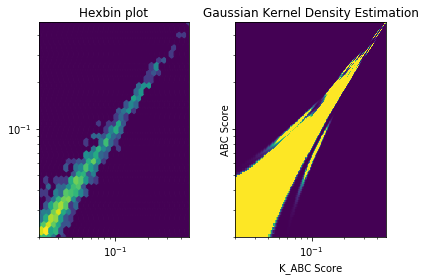

In [131]:
# Make Plot 
fig, axes = plt.subplots(ncols=2, nrows=1, sharex=True, sharey=True)
#plt.scatter(actual_scores, scores, s=6)
plt.xlabel('K_ABC Score')
plt.ylabel('ABC Score')
nbins=30

axes[0].set_title('Hexbin plot')
axes[0].hexbin(x, y, gridsize=nbins, bins='log',xscale='log', yscale='log')
axes[1].set_title('Gaussian Kernel Density Estimation')
axes[1].pcolormesh(xi,yi,zi.reshape(xi.shape), vmin=0, vmax=1)
fig.tight_layout()

In [132]:
import scipy.stats

print("Pearson_correlation: {}".format(scipy.stats.pearsonr(actual_scores_1, scores_1)))
print("Spearman_correlation: {}".format(scipy.stats.spearmanr(actual_scores_1,scores_1)))

Pearson_correlation: (0.991812961364814, 0.0)
Spearman_correlation: SpearmanrResult(correlation=0.944903261580303, pvalue=0.0)


(array([ 24.,  36.,  30.,  56.,  73.,  74., 144., 184., 136.,  94.,  76.,
         61.,  40.]),
 array([-0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001,  0.   ,
         0.001,  0.002,  0.003,  0.004,  0.005,  0.006]),
 <a list of 13 Patch objects>)

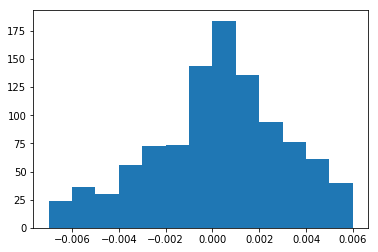

In [136]:
from matplotlib import pyplot as plt
import numpy as np

differences = np.array(x) - np.array(y)
plt.hist(differences, bins=np.arange(-0.007,0.007, 0.001))

In [135]:
print(abs(np.mean(differences)))
print(np.std(differences))


0.0002791435368754956
0.005910373511682405


In [137]:
(differences>0.05).sum()

0

## Looking at the points that weren't considered 

Of 1371 entries, only 1261 were similar in both J and K's EnhancerPredictions.txt entries 

What could be the remaining 110 entries? 
- extra enhancer regions being picked out 

In [146]:
J_data = pd.read_csv("../EnhancerPredictions/17_June_data/J_EnhancerPredictions.txt", sep='\t')
data = pd.read_csv("../EnhancerPredictions/17_June_data/EnhancerPredictions.txt", sep='\t')

unique_genes = J_data[['TargetGene', 'TargetGeneTSS']].drop_duplicates()

In [171]:
J_data=J_data[['chr', 'start', 'end', 'TargetGene', 'TargetGeneTSS','class','hic.distance.adj', 'activity_base', 'ABC.Score']]
data = data[['chr', 'start', 'end', 'TargetGene', 'TargetGeneTSS','class','hic.distance.adj', 'activity_base', 'ABC.Score']]

In [170]:
J_data.loc[(J_data['TargetGene']=='LOC105373044')]

,chr,start,end,TargetGene,TargetGeneTSS,class,hic.distance.adj,activity_base,ABC.Score
1003,chr22,41935652,41936305,LOC105373044,41956887,genic,24.1927,5.2331,0.0307
1004,chr22,41958946,41959718,LOC105373044,41956887,genic,100.0000,4.2601,0.1031
1005,chr22,41961278,41961993,LOC105373044,41956887,genic,90.3231,7.1592,0.1566


In [169]:
data.loc[(data['TargetGene']=='LOC105373044')]

,chr,start,end,TargetGene,TargetGeneTSS,class,hic.distance.adj,activity_base,ABC.Score
987,chr22,41935652,41936305,LOC105373044,41956887,genic,25.3940,5.2331,0.0310
988,chr22,41919569,41920069,LOC105373044,41956887,genic,9.8714,9.7731,0.0225
989,chr22,41958946,41959718,LOC105373044,41956887,genic,100.0000,4.2601,0.0992
990,chr22,41961278,41961993,LOC105373044,41956887,genic,92.3711,7.1592,0.1540


In [95]:
J_data.loc[(J_data['TargetGene']=='MCAT')]

,chr,start,end,TargetGene,TargetGeneTSS,class,hic.distance.adj,activity_base,ABC.Score
1095,chr22,43559722,43560222,MCAT,43539403,intergenic,24.9328,1.9455,0.0237
1096,chr22,43580300,43581051,MCAT,43539403,genic,10.4528,5.5618,0.0284
1097,chr22,43499947,43500447,MCAT,43539403,intergenic,16.1245,3.8549,0.0303
1098,chr22,43579324,43580252,MCAT,43539403,genic,14.8200,17.1219,0.1237


In [96]:
data.loc[(data['TargetGene']=='MCAT')]

,chr,start,end,TargetGene,TargetGeneTSS,class,hic.distance.adj,activity_base,ABC.Score
1083,chr22,43403511,43404011,MCAT,43539403,genic,8.6291,6.0807,0.0229
1084,chr22,43559722,43560222,MCAT,43539403,intergenic,27.7878,1.9455,0.0236
1085,chr22,43580300,43581051,MCAT,43539403,genic,14.0896,5.5618,0.0342
1086,chr22,43499947,43500447,MCAT,43539403,intergenic,21.5633,3.8549,0.0363
1087,chr22,43579324,43580252,MCAT,43539403,genic,18.3480,17.1219,0.1372
